# Read Data

In [130]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sn

In [131]:
file_path = 'data/sp500/SP500.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266000 entries, 0 to 3265999
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Ticker          object        
 1   Date            datetime64[ns]
 2   Low             float64       
 3   Open            float64       
 4   Volume          float64       
 5   High            float64       
 6   Close           float64       
 7   Adjusted Close  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 199.3+ MB


In [132]:
df.describe()

,Date,Low,Open,Volume,High,Close,Adjusted Close
count,3266000,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06
mean,2004-01-19 09:03:18.645927296,3.821284e+02,3.849360e+02,5.064393e+06,3.881214e+02,3.851922e+02,3.783433e+02
min,1970-01-02 00:00:00,1.000000e-05,0.000000e+00,0.000000e+00,1.000000e-05,1.000000e-05,-2.799133e+02
25%,1994-10-06 00:00:00,7.900000e+00,7.680000e+00,3.658000e+05,8.125000e+00,8.000000e+00,4.141712e+00
50%,2005-12-22 00:00:00,2.345833e+01,2.369754e+01,1.232220e+06,2.405688e+01,2.377000e+01,1.595139e+01
75%,2014-12-12 00:00:00,5.196863e+01,5.243404e+01,3.357400e+06,5.317000e+01,5.258000e+01,4.232024e+01
max,2022-12-12 00:00:00,5.333450e+05,5.443890e+05,7.421641e+09,5.443890e+05,5.391800e+05,5.391800e+05
std,NaN,8.803883e+03,8.874080e+03,3.072309e+07,8.933282e+03,8.868704e+03,8.868953e+03


In [133]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
counts

Number of null values per column:


,count,nulls
Ticker,3266000,0
Date,3266000,0
Low,3258423,7577
Open,3258423,7577
Volume,3258423,7577
High,3258423,7577
Close,3258423,7577
Adjusted Close,3258423,7577


In [134]:
#check it there are rows with the same ticker and date
df.duplicated(['Ticker', 'Date']).sum()

0

In [135]:
df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Adjusted Close
0,A,1999-11-18,28.612303,32.546494,62546380.0,35.765381,31.473534,26.929760
1,A,1999-11-19,28.478184,30.713518,15234146.0,30.758226,28.880545,24.711119
2,A,1999-11-22,28.657009,29.551144,6577870.0,31.473534,31.473534,26.929760
3,A,1999-11-23,28.612303,30.400572,5975611.0,31.205294,28.612303,24.481602
4,A,1999-11-24,28.612303,28.701717,4843231.0,29.998213,29.372318,25.131901


# Data Visualization

In [136]:
# Plot that shows a column over time
def plot_column_over_time(column, ticker):
    selected_df = df.loc[df['Ticker'] == ticker]
    plt.plot(selected_df['Date'], selected_df[column])
    plt.xlabel('Date')
    plt.ylabel(column)

    plt.title(column + ' Price Over Time of ' + ticker)
    plt.show()

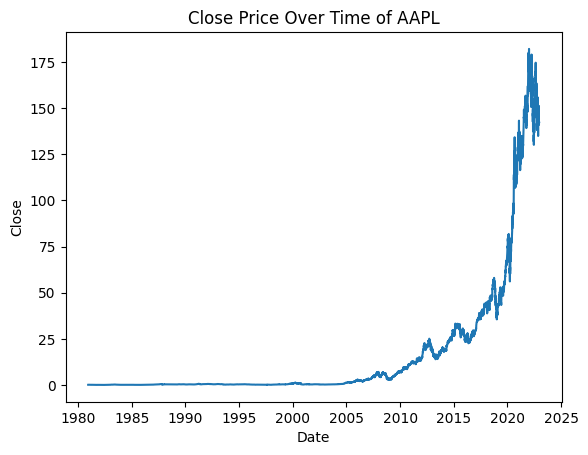

In [137]:
plot_column_over_time('Close', 'AAPL')

In [138]:
def plot_features_relationships(ticker):  
    sn.pairplot(df.loc[df['Ticker'] == ticker] )
    plt.show()

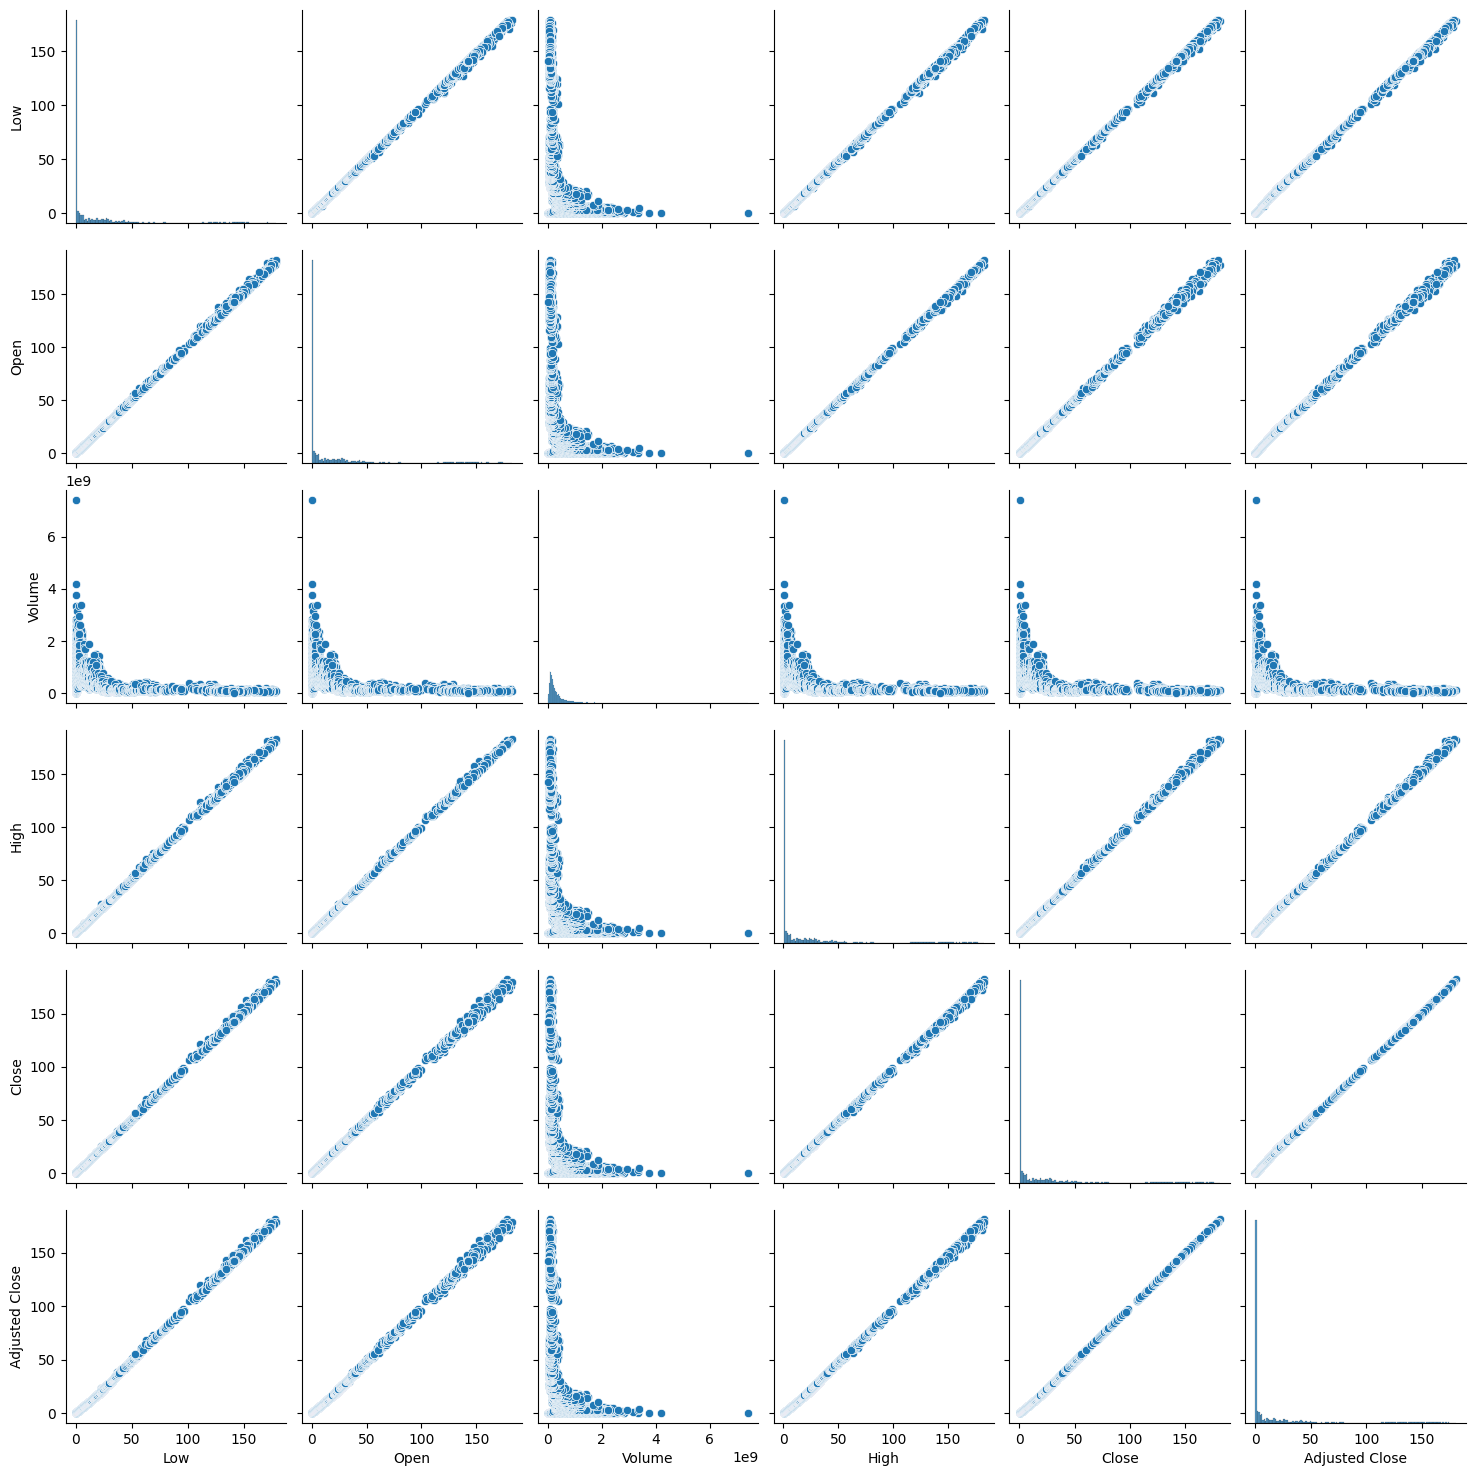

In [139]:
plot_features_relationships('AAPL')

In [140]:
def plot_correlation_matrix(ticker): 
    plt.figure(figsize=(10, 8))
    df_corr = df[df['Ticker'] == ticker]
    df_corr = df_corr.drop(columns={'Ticker', 'Date'}, axis = 1)
    sn.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(ticker + ' Correlation Heatmap')
    plt.show()

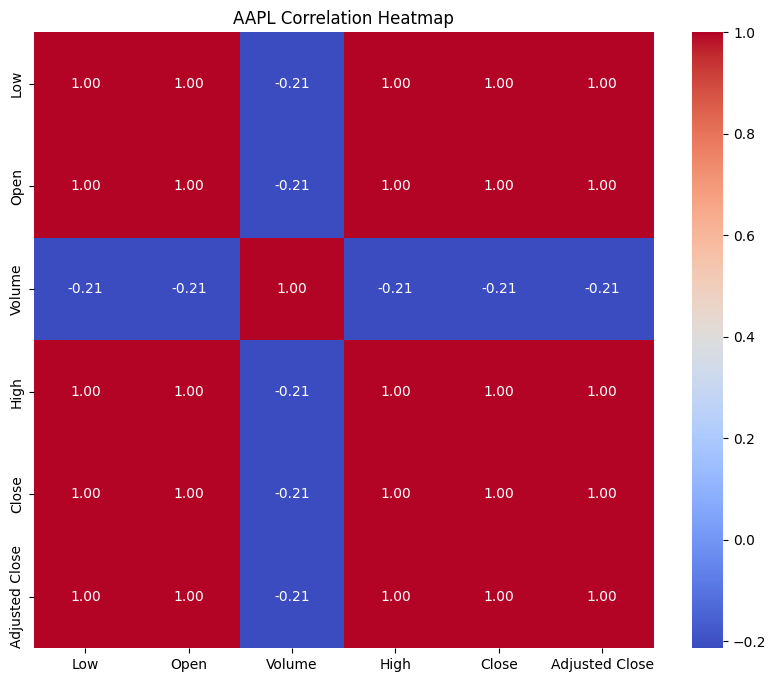

In [141]:
plot_correlation_matrix('AAPL')

# Data Exploration

### Rank the ticker by max Close

In [142]:
# Group by 'Ticker' and get the maximum 'Adjusted Close' for each
highest_adjusted_close_per_ticker = df.groupby('Ticker')['Close'].max()

# Sort the values in descending order to get the highest values at the top
highest_adjusted_close_per_ticker_sorted = highest_adjusted_close_per_ticker.sort_values(ascending=False)
max_close = highest_adjusted_close_per_ticker_sorted.max()
min_close = highest_adjusted_close_per_ticker_sorted.min()
range_close = max_close - min_close

print(f"Interval [{min_close:.4f}, {max_close:.4f}] and range {range_close:.4f}")

Interval [0.0790, 539180.0000] and range 539179.9210


### Number of impressions for each year

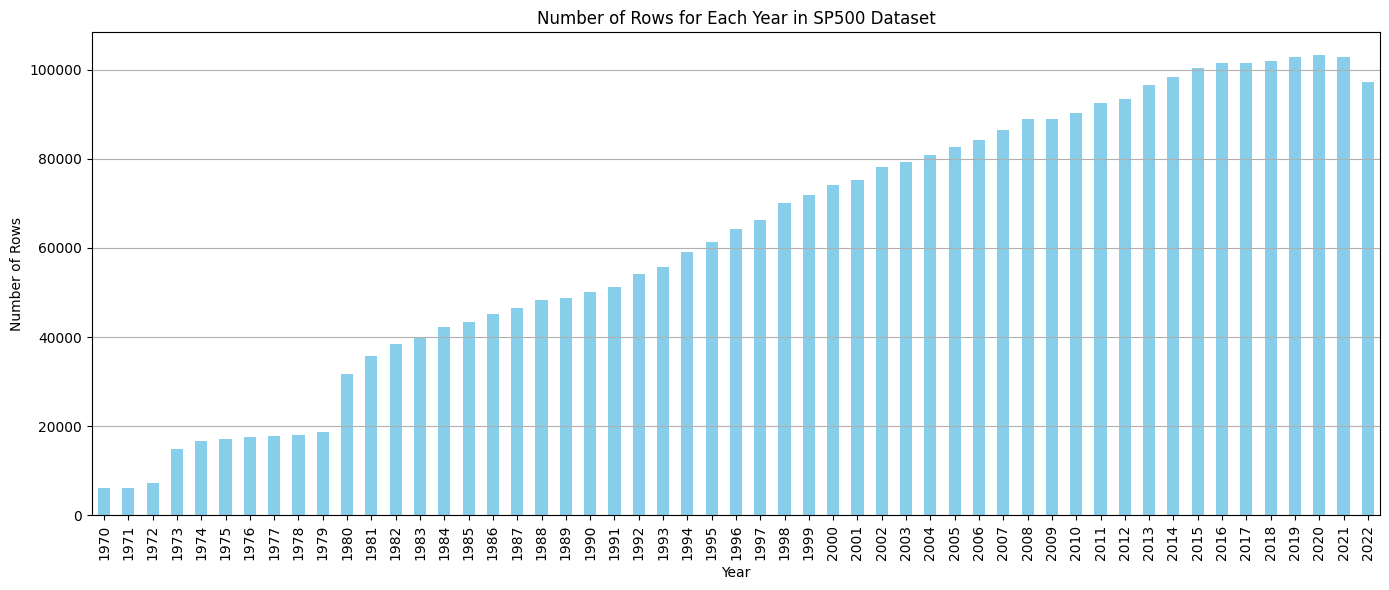

In [143]:
# Reload the SP500 dataset
df_plot = pd.read_csv('data/sp500/SP500.csv')

# Convert 'Date' column to datetime format
df_plot['Date'] = pd.to_datetime(df_plot['Date'])

# Extract the year from the 'Date' column
df_plot['Year'] = df_plot['Date'].dt.year

# Count the number of rows for each year
rows_per_year = df_plot.groupby('Year').size()

# Plotting
plt.figure(figsize=(14, 6))
rows_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Rows for Each Year in SP500 Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Percentage of missing value for each ticker

In [144]:
# Count the missing values for 'Close' for each ticker
missing_counts = df[df['Close'].isnull()].groupby('Ticker').size()

# Count the total number of rows for each ticker
total_counts = df.groupby('Ticker').size()

# Calculate the percentage of missing values for each ticker
missing_percentage = (missing_counts / total_counts * 100).sort_values(ascending=False)

missing_percentage

Ticker
BHI     82.053654
CTQ     54.536047
CNWT    13.715830
INTH    13.023835
SONC    12.760644
          ...    
XYL           NaN
YUM           NaN
ZBH           NaN
ZION          NaN
ZTS           NaN
Length: 409, dtype: float64

### Print all the ticker with missing values

/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_15940/1369510978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=tot_missing, x='Ticker', y='Overall Missing Percentage', palette='viridis')


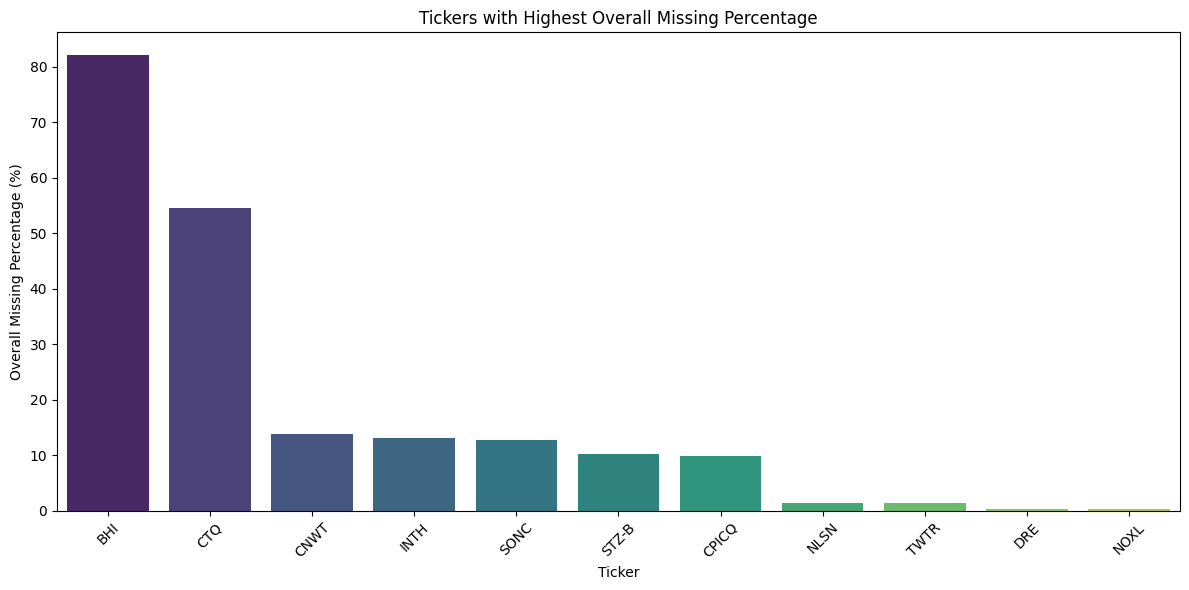

In [145]:
missing = pd.read_csv("data/sp500/missing_values.csv")
# Select the top tickers with the highest 'Overall Missing Percentage'
tot_missing = missing.dropna(subset=['Overall Missing Percentage'])\
                        .drop_duplicates(subset=['Ticker'])\
                        .nlargest(11, 'Overall Missing Percentage')

# Plot
plt.figure(figsize=(12, 6))
sn.barplot(data=tot_missing, x='Ticker', y='Overall Missing Percentage', palette='viridis')
plt.title('Tickers with Highest Overall Missing Percentage')
plt.ylabel('Overall Missing Percentage (%)')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Missing value tickers by year

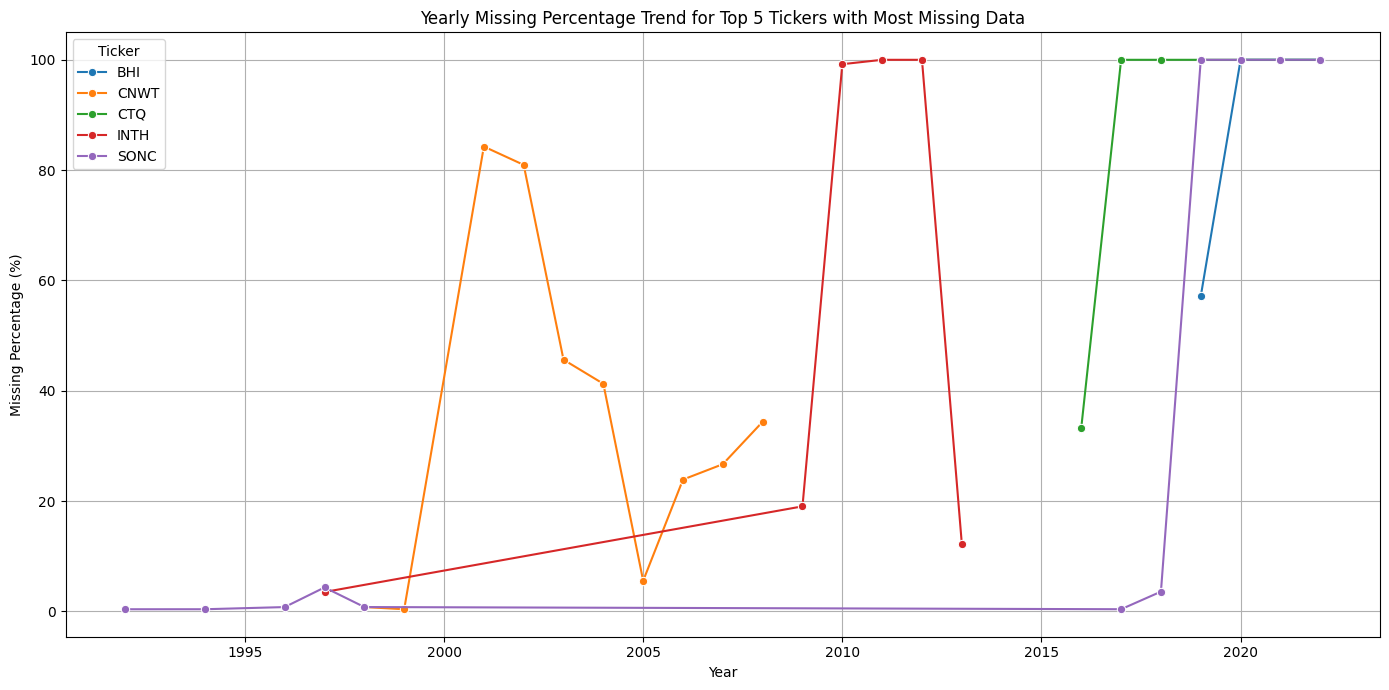

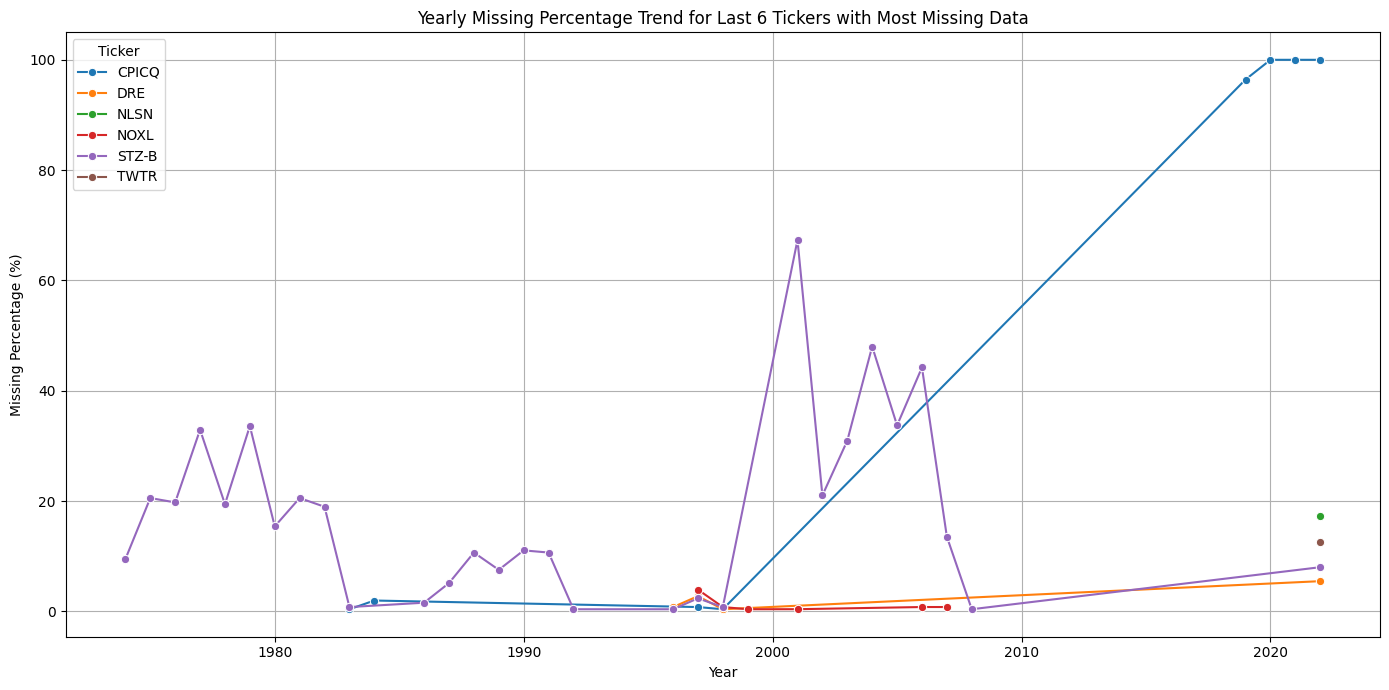

In [146]:
for i in range(1,3):
    # Select a few tickers from the top missing for visualization
    if i==1:
        selected_tickers = tot_missing['Ticker'].head(5).tolist()
        title = 'Yearly Missing Percentage Trend for Top 5 Tickers with Most Missing Data'
    else:
        selected_tickers = tot_missing['Ticker'].tail(6).tolist()
        title = 'Yearly Missing Percentage Trend for Last 6 Tickers with Most Missing Data'

    # Filter data for these tickers
    selected_data = missing[missing['Ticker'].isin(selected_tickers)]

    # Line plot
    plt.figure(figsize=(14, 7))
    sn.lineplot(data=selected_data, x='Year', y='Missing Percentage', hue='Ticker', marker='o')
    plt.title(title)
    plt.ylabel('Missing Percentage (%)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Ticker')
    plt.show()


In [147]:
df = df.sort_values(by="Date")
df = df.reset_index(drop=True)
df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Adjusted Close
0,DTE,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171,0.453444
1,GE,1970-01-02,6.129808,6.209936,289536.0,6.219952,6.139824,1.267613
2,IBM,1970-01-02,17.399618,17.423517,330536.0,17.483271,17.435469,4.003040
3,MSI,1970-01-02,3.398191,0.000000,79601.0,3.423317,3.423317,1.646649
4,ED,1970-01-02,6.406250,6.406250,73200.0,6.750000,6.750000,0.253828


In [148]:
print(df.loc[len(df)*0.9])

Ticker                           AAPL
Date              2019-10-09 00:00:00
Low                             56.41
Open                          56.7575
Volume                     74770400.0
High                        56.947498
Close                         56.7575
Adjusted Close              55.437607
Name: 2939400, dtype: object


# Data Preparation

In [149]:
df.drop('Adjusted Close', axis=1, inplace=True)

### Missing Values Handling

In [150]:
#Drop the Ticker that after 2019 has 100% of missing values
df.drop(df[df['Ticker'].isin(['CTQ', 'SONC', 'BHI', 'CPICQ'])].index, inplace=True)
#Drop missing values
df.dropna(inplace=True)
df.head()

,Ticker,Date,Low,Open,Volume,High,Close
0,DTE,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171
1,GE,1970-01-02,6.129808,6.209936,289536.0,6.219952,6.139824
2,IBM,1970-01-02,17.399618,17.423517,330536.0,17.483271,17.435469
3,MSI,1970-01-02,3.398191,0.000000,79601.0,3.423317,3.423317
4,ED,1970-01-02,6.406250,6.406250,73200.0,6.750000,6.750000


In [151]:
missing_values = df.isnull().sum()

# Print out missing values
print(missing_values)

Ticker    0
Date      0
Low       0
Open      0
Volume    0
High      0
Close     0
dtype: int64


In [152]:
# Find the maximum date for each 'Ticker'
max_dates = df.groupby('Ticker')['Date'].max()

# Identify tickers whose maximum date is on or before December 31, 2019
tickers_no_data_post_2019 = max_dates[max_dates <= pd.Timestamp('2019-12-31')].index.tolist()

# Display the tickers
print(tickers_no_data_post_2019)

[]


### Data Splitting

In [153]:
print(df.loc[int(len(df)*0.9)])

Ticker                    ESS
Date      2019-07-23 00:00:00
Low                291.109985
Open               292.470001
Volume               354000.0
High               295.660004
Close              295.609985
Name: 2916666, dtype: object


In [154]:
print(len(df))
print(len(df)*0.9)

3240740
2916666.0


In [156]:
split_index = int(len(df) * 0.9)

# Split the DataFrame into two parts
training_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
training_df.head()

,Ticker,Date,Low,Open,Volume,High,Close
0,DTE,1970-01-02,18.297873,18.297873,7520.0,18.936171,18.936171
1,GE,1970-01-02,6.129808,6.209936,289536.0,6.219952,6.139824
2,IBM,1970-01-02,17.399618,17.423517,330536.0,17.483271,17.435469
3,MSI,1970-01-02,3.398191,0.000000,79601.0,3.423317,3.423317
4,ED,1970-01-02,6.406250,6.406250,73200.0,6.750000,6.750000


### Remove label and create csvs

In [157]:
training_df = training_df.sort_values(by="Date")
test_df = test_df.sort_values(by="Date")
training_df = training_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
test_df.head()

,Ticker,Date,Low,Open,Volume,High,Close
0,PFE,2019-10-08,33.605312,33.823528,14761270.0,34.041744,33.614799
1,TJX,2019-10-08,55.029999,55.320000,5418300.0,56.150002,55.419998
2,ESS,2019-10-08,326.309998,329.950012,285900.0,330.769989,327.709991
3,NEE,2019-10-08,57.490002,58.035000,6968000.0,58.044998,57.492500
4,NOW,2019-10-08,257.980011,266.000000,1162000.0,268.369995,258.130005


In [158]:
# Split the data into features and target variable
training_df.to_csv('data/sp500/SP500_training.csv', index=False)
test_df.to_csv('data/sp500/SP500_test.csv', index=False)

### Validation Split

In [160]:
print(training_df.loc[int(len(training_df)*0.9)])

Ticker                   MDLZ
Date      2016-11-17 00:00:00
Low                 42.110001
Open                42.700001
Volume              9950600.0
High                43.009998
Close               42.990002
Name: 2624999, dtype: object
